In [5]:
!pip install jupyterthemes
!jt -r

Reset css and font defaults in:
C:\Users\Bhagu\.jupyter\custom &
C:\Users\Bhagu\AppData\Roaming\jupyter\nbextensions


#Product Recommender System
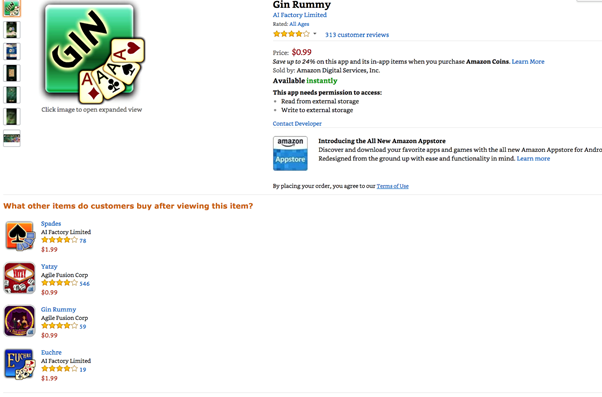
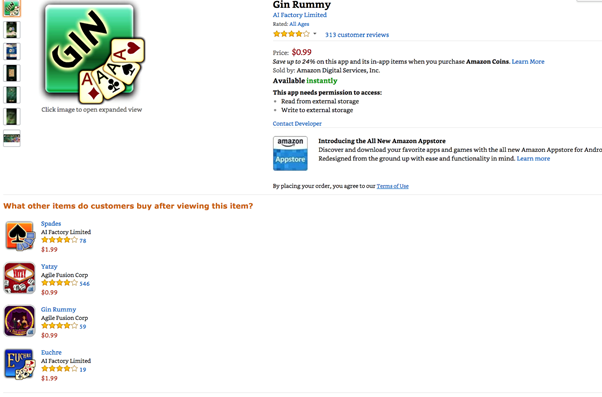
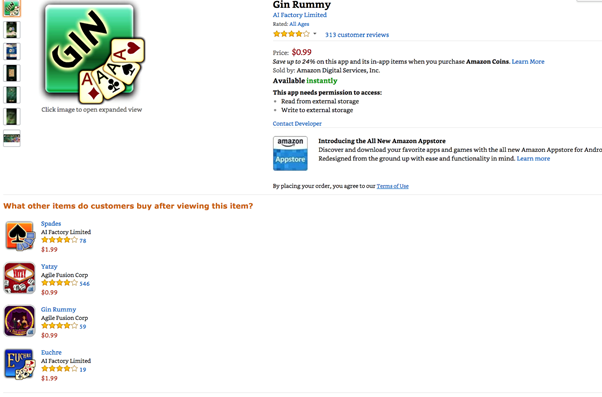
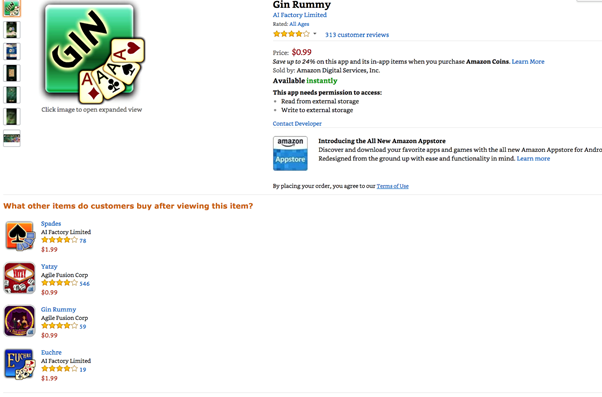


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from gensim.scripts.glove2word2vec import glove2word2vec
import os

In [3]:
data = pd.read_csv('sample-data.csv')

In [8]:
import string
import re

def clean(Text):
    Text = re.sub('-',' ',Text)
    Text = re.sub('>','> ',Text)
    Text = re.sub('<',' <',Text)
    Text = "".join([ch for ch in Text if ch not in string.punctuation])
    cleanr = re.compile('<.*>')
    cleantext = re.sub(cleanr, ' ', Text)
    cleantext = re.sub(' +',' ',cleantext)
    return cleantext


In [6]:
## very little cleaning
data_clean = data.copy()
data_clean['description'] = data_clean['description'].str.lower()
data_clean['description'] = data_clean['description'].apply(clean)

# APPROACH 1:
## We first try the statistical NLP approach by calculating the tf-idf based features for the dataset
## and then use the cosine similarity function to calculate the list of most similar products to a given input

In [9]:
## Create a TF-IDF matrix of unigrams, bigrams, and trigrams for each product. The 'stop_words' param
## tells the TF-IDF module to ignore common english words like 'the', etc.

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(data_clean['description'])

NameError: name 'data_clean' is not defined

In [8]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [9]:
cosine_similarities.shape

(500, 500)

In [10]:
def get_similarity_m(product_id,cosine_similarities,data_clean,number_similar_products =10,show_simlar = 2):
    similar_products = cosine_similarities[product_id-1].argsort()[:-number_similar_products:-1]
    similar_products = similar_products[1:,]
    print('Description of Product:')
    print(data["description"][product_id-1])
    print('\n')
    print("Similar product to {0} : ".format(product_id))
    for x in similar_products:
        print(x+1)
    print('\n')
    print('Description of Most Similar Product:')
    print(data["description"][similar_products[0]])
    print('\n')
    print(data["description"][similar_products[1]])

In [11]:
get_similarity_m(9,cosine_similarities,data)

Description of Product:
Baby micro d-luxe cardigan - Micro D-Luxe is a heavenly soft fabric with down-to-earth applications. This cardigan is made from a quick-drying, durable 4.6-oz 100% polyester (87% recycled) microdenier fleece that is lightweight and breathable so it can work as a top or midlayer. A wind flap backs the zip front, while the hood has covered-elastic side trim to bundle babies in deep warmth. With slash-style patch pockets, color-coordinating elbow patches and soft self-fabric cuffs. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Soft, microdenier fleece made from 87% recycled polyester is durable and quick-to-dry"</li> <li>Hood stays secure with covered side elastic</li> <li>Inside neck tape for a clean finish</li> <li>Handwarmer patch pockets</li> <li>"Full front zip backed by a wind flap; soft, self-fabric cuffs"</li></ul><br><br><b>Fabric: </b>4.6-oz 100% microdenier polyester (87% recycled) fleece. Recyclable through the

# APPROACH 2:
## We use word 2 vec to get the paragraph vector of the data
## and then use the cosine similarity function to calculate the list of most similar products to a given input

In [12]:
import gensim

In [26]:
tf_idf = TfidfVectorizer(stop_words='english')
vectorizer = tf_idf.fit(data_clean['description'])
result = vectorizer.transform(data_clean['description'])
print(result)

  (0, 4726)	0.06491881637990579
  (0, 4694)	0.02427999723649364
  (0, 4619)	0.12983763275981158
  (0, 4490)	0.13398527689804227
  (0, 4468)	0.10619137486360075
  (0, 4463)	0.04779071088655278
  (0, 4381)	0.09650264198550967
  (0, 4362)	0.21546709153193283
  (0, 4285)	0.06452405692498342
  (0, 4260)	0.11115299128899303
  (0, 4199)	0.13931737137157027
  (0, 4013)	0.11306564023949445
  (0, 3907)	0.10619137486360075
  (0, 3884)	0.07625615844522986
  (0, 3793)	0.05631642308967403
  (0, 3782)	0.12576788056168753
  (0, 3781)	0.146191636747464
  (0, 3757)	0.09969342207510834
  (0, 3361)	0.06452405692498342
  (0, 3353)	0.09412772531167501
  (0, 3352)	0.06452405692498342
  (0, 3343)	0.15588036962555507
  (0, 3291)	0.12725372181964456
  (0, 3227)	0.06452405692498342
  (0, 3144)	0.08396926289220455
  :	:
  (499, 1919)	0.10594533510695886
  (499, 1906)	0.08442916644944776
  (499, 1814)	0.0681573051863249
  (499, 1771)	0.07295151660775283
  (499, 1753)	0.05390751909264
  (499, 1699)	0.10052186294005

In [14]:
names = vectorizer.get_feature_names()
result = np.array(result.todense())

In [15]:
## create dictionary with having tf-idf more than 0.1 and 

tf_idf_words = []
for r in result:
    dict_word = {}
    non_zero = np.where(r != 0)[0]
    for word in non_zero:
        if r[word] > 0.1:
            dict_word[names[word]] = r[word]
    tf_idf_words.append(dict_word)

In [16]:
data_clean['tf_idf_desc'] = tf_idf_words

In [ ]:
### Install the Google word to vector #####
#os.system('''curl https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz -o GoogleNews-vectors-negative300.bin.gz && sudo gunzip GoogleNews-vectors-negative300.bin.gz ''')

In [17]:
##### load the available Google vectors ######
model = gensim.models.KeyedVectors\
        .load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [18]:
########  create the new word2vec #######

def w2v_vectorize_desc(x):
    coeff = 0
    vector = np.zeros(300)
    for word in x:
        if word in model:
            coeff = coeff + x[word]
            vector = vector + model[word] * x[word]
    if coeff != 0:
        vector = vector / coeff
    return list(vector)

In [19]:
###### apply the transformation #########
data_clean['tf_idf_desc'] = data_clean\
            .apply(lambda x: w2v_vectorize_desc(x['tf_idf_desc']), axis=1)

In [20]:
data_w2v = data_clean[['id','tf_idf_desc']]

In [21]:
products = data_w2v.id.values
vectors = data_clean.tf_idf_desc.values

file = open("product_glove", "w")
for p, v in zip(products, vectors):
    vector_s = " ".join(map(str, v))
    file.write(str(p) + " " + vector_s + '\n')
file.close()


In [22]:
####### product_w2v  using gensim ###########
glove2word2vec("product_glove", "product_w2v")

(500, 300)

In [5]:
##### load the model ##########
product2vec = gensim.models.KeyedVectors.load_word2vec_format("product_w2v")

NameError: name 'gensim' is not defined

In [24]:
def get_similarity_w2v(product_id,product2vec,data_clean,number_similar_products =10,show_simlar = 2):
    similar_products = pd.DataFrame(product2vec.most_similar(str(product_id), topn = number_similar_products),columns= ['product_id','score'] )
    print('Description of Product:')
    print(data["description"][product_id-1])
    print('\n')
    print("Similar product to {0} : ".format(product_id))
    for x in range(0,10):
        print(similar_products.iloc[int(x),0])
    print('\n')
    print('Description of Most Similar Product:')
    print([data.loc[int(similar_products.iloc[1,0])-1,"description"]])
    print('\n')
    print([data.loc[int(similar_products.iloc[2,0])-1,"description"]])    
    

In [25]:
get_similarity_w2v(45,product2vec,data_clean)

Description of Product:
Girl's boardie capris - Built for two-week camping trips on Baja beaches, these capris are made of a lightweight, soft-brushed 3.7-oz 100% microfiber polyester that handles salt water, sand and dirt, dry quickly, and have a DWR (durable water repellent) finish. Two back darts and a built-in elastic waist adjustment hone the fit. Three-snap leg openings allow vented styling. With a hook-and-loop soft-tie fly and a self-draining back patch pocket. Hip-riding. Inseam is 18". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Lightweight, soft-brushed microfiber polyester dries quickly and has a Deluge DWR (durable water repellent) finish"</li> <li>Two back darts and a built-in elastic waist adjustment hone the fit</li> <li>3-snap leg openings allow vented styling</li> <li>"Hook-and-loop, soft-tie fly and self-draining back patch pocket"</li> <li>Hip-riding</li> <li>"Inseam is 18"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% mi